In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import sys
sys.path.append('/home/claudio/Projects/mbdyn-adapter-test/python/')

In [3]:
from mbdyn_reader import *

# Read Data

In [4]:
folder = '../'
os.chdir(folder)

name = 'out_mbd'
#name = 'test_force'

d_act = read_data(name+'.act')
d_ine = read_data(name+'.ine')
d_mov = read_data(name+'.mov')

d_frc = read_frc(name+'.frc')

d_jnt = read_data(name+'.jnt')

os.chdir('./plot')

reading ACT file
reading INE file
reading MOV file
reading FRC file
reading JNT file


In [5]:
title = r'10 beams 21 joints OF-MBdyn'
fname = 'cyl-flap_OF-MBDyn'

In [6]:
deltat = 0.001

# Plot ACT Data

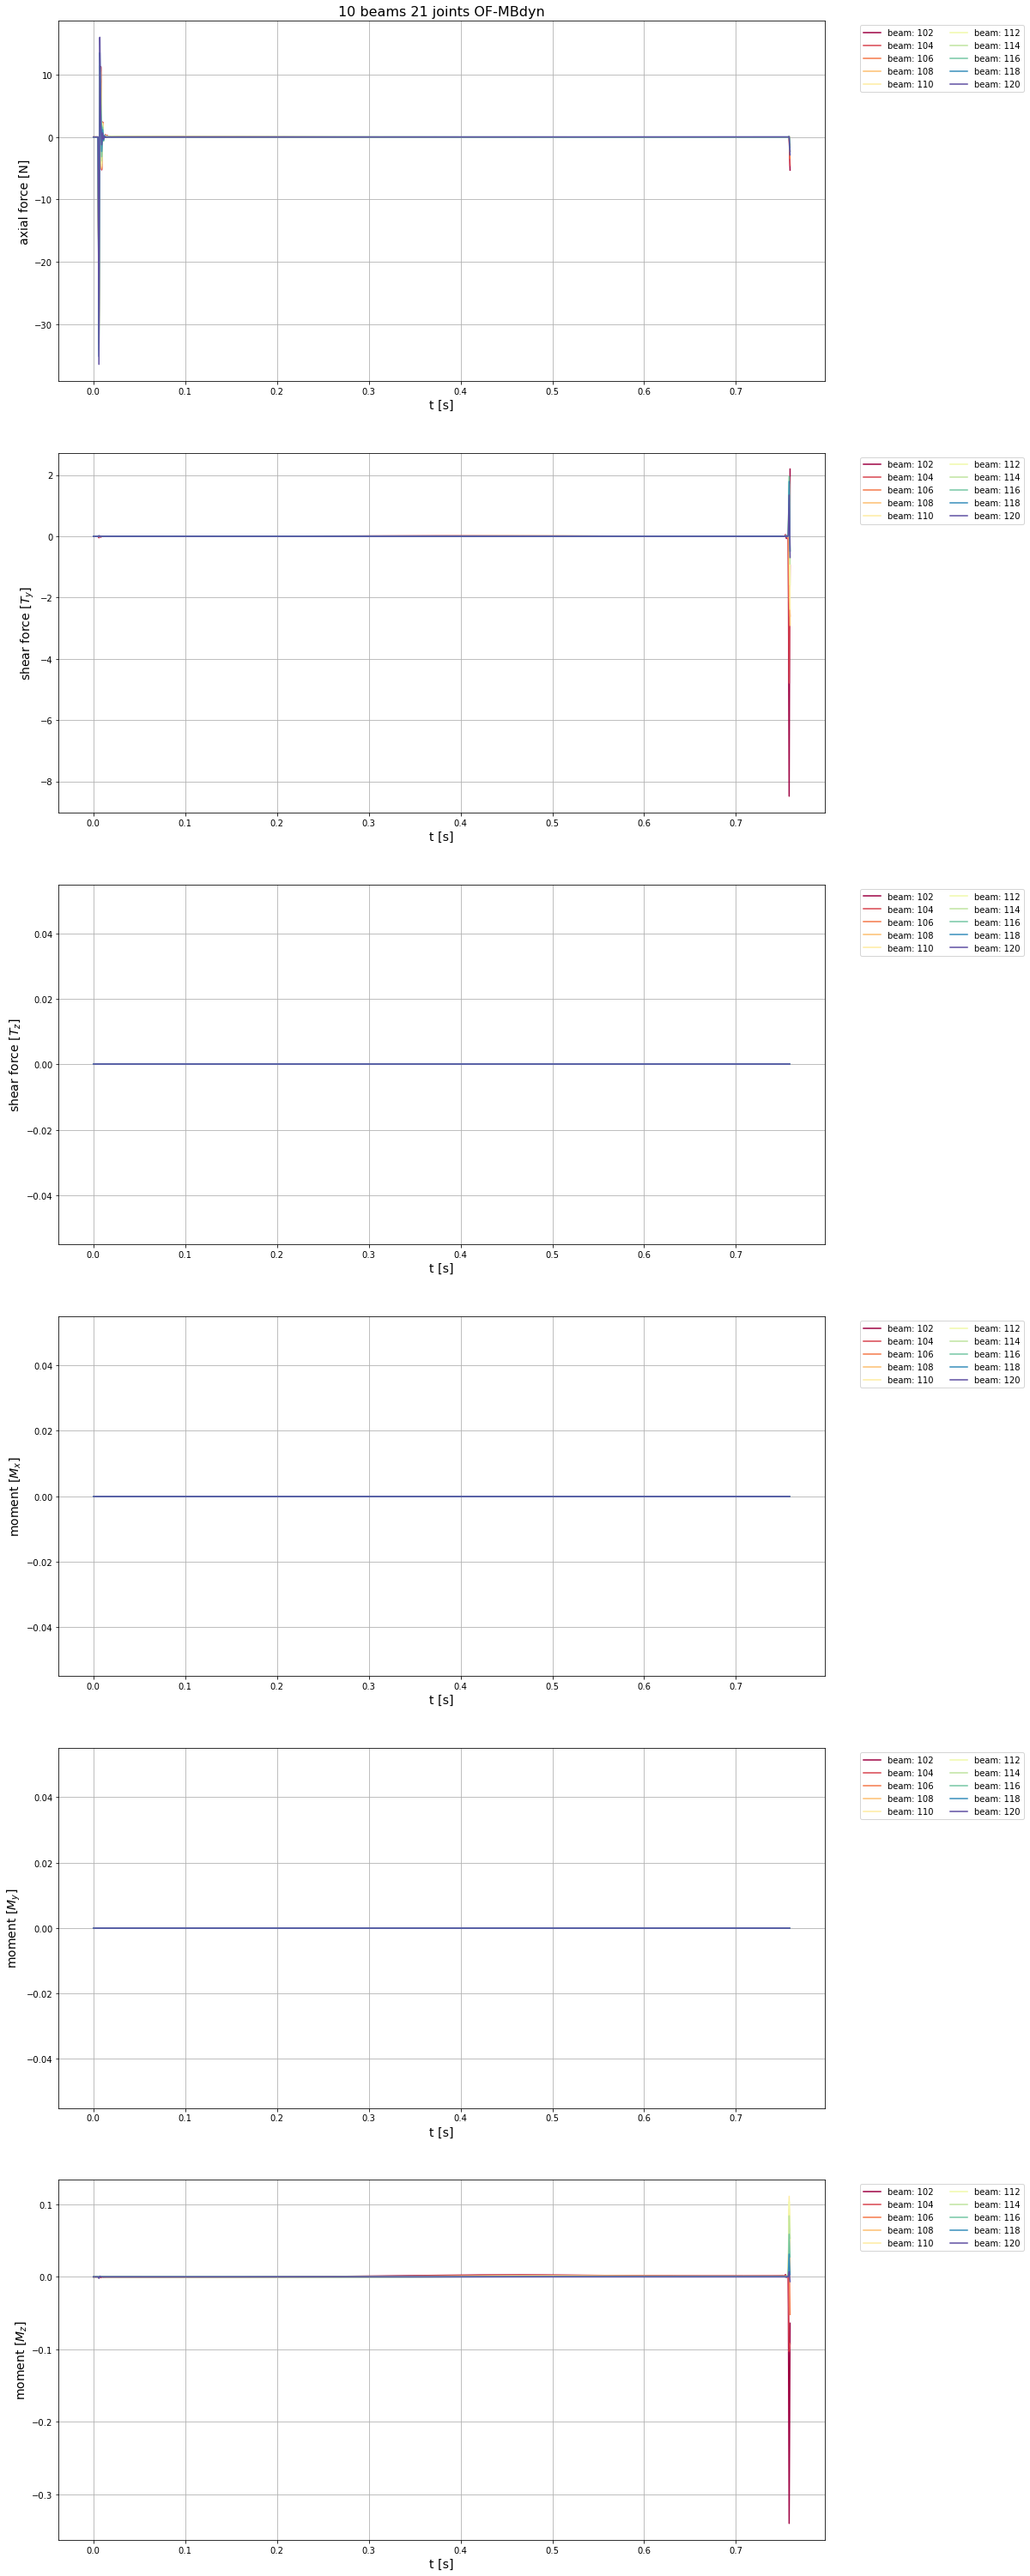

In [7]:
plot_act(d_act, title=title,filename=fname, dt=deltat)

# Plot FRC mapping

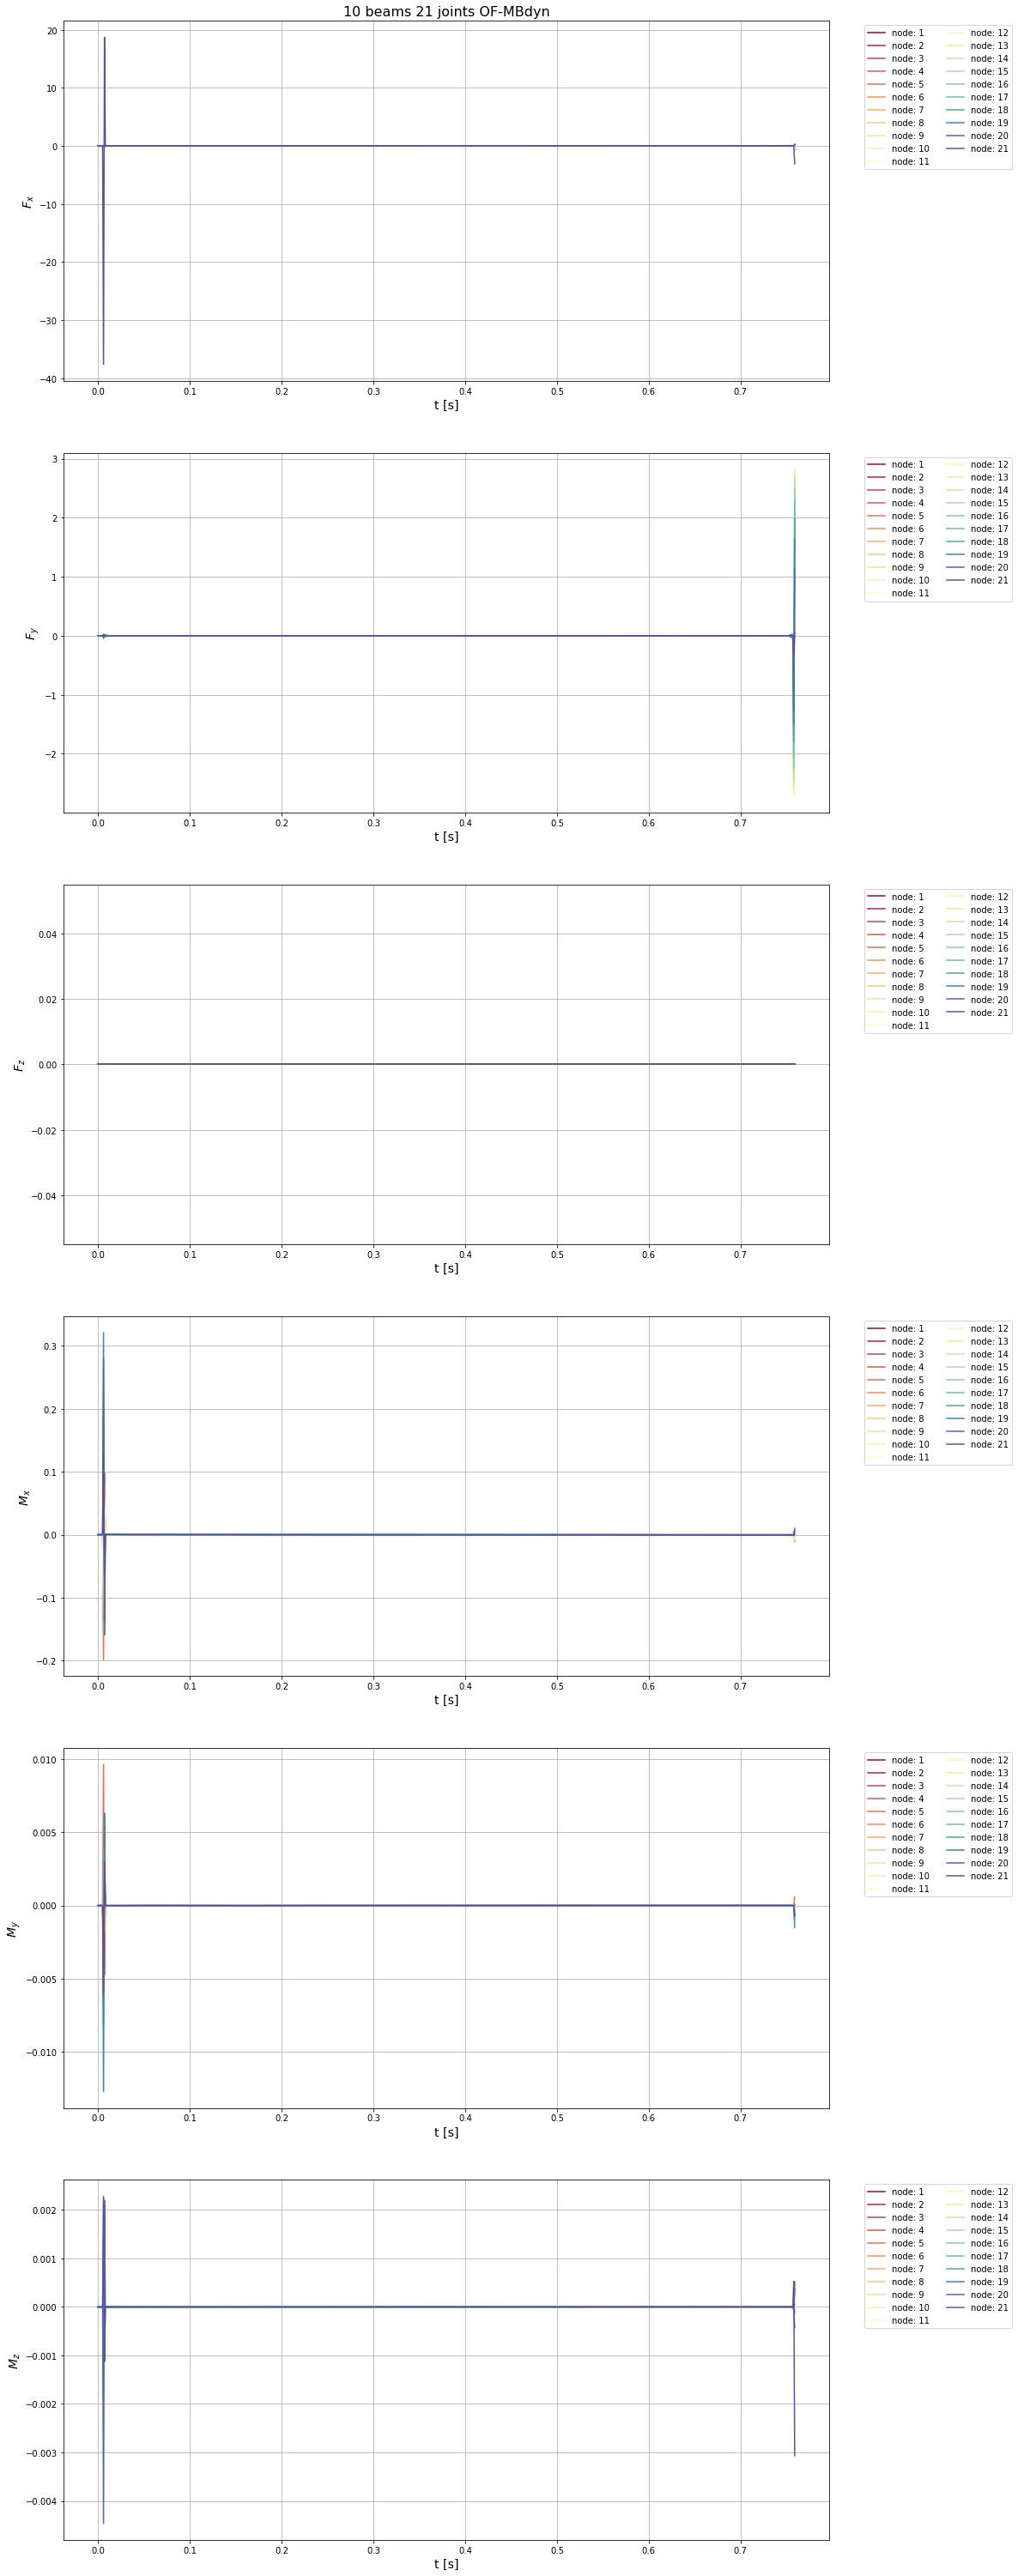

In [8]:
plot_frc(d_frc, title=title, filename=fname, dt=deltat, force_set='1', ext_struct=True)

# Plot FRC nodal

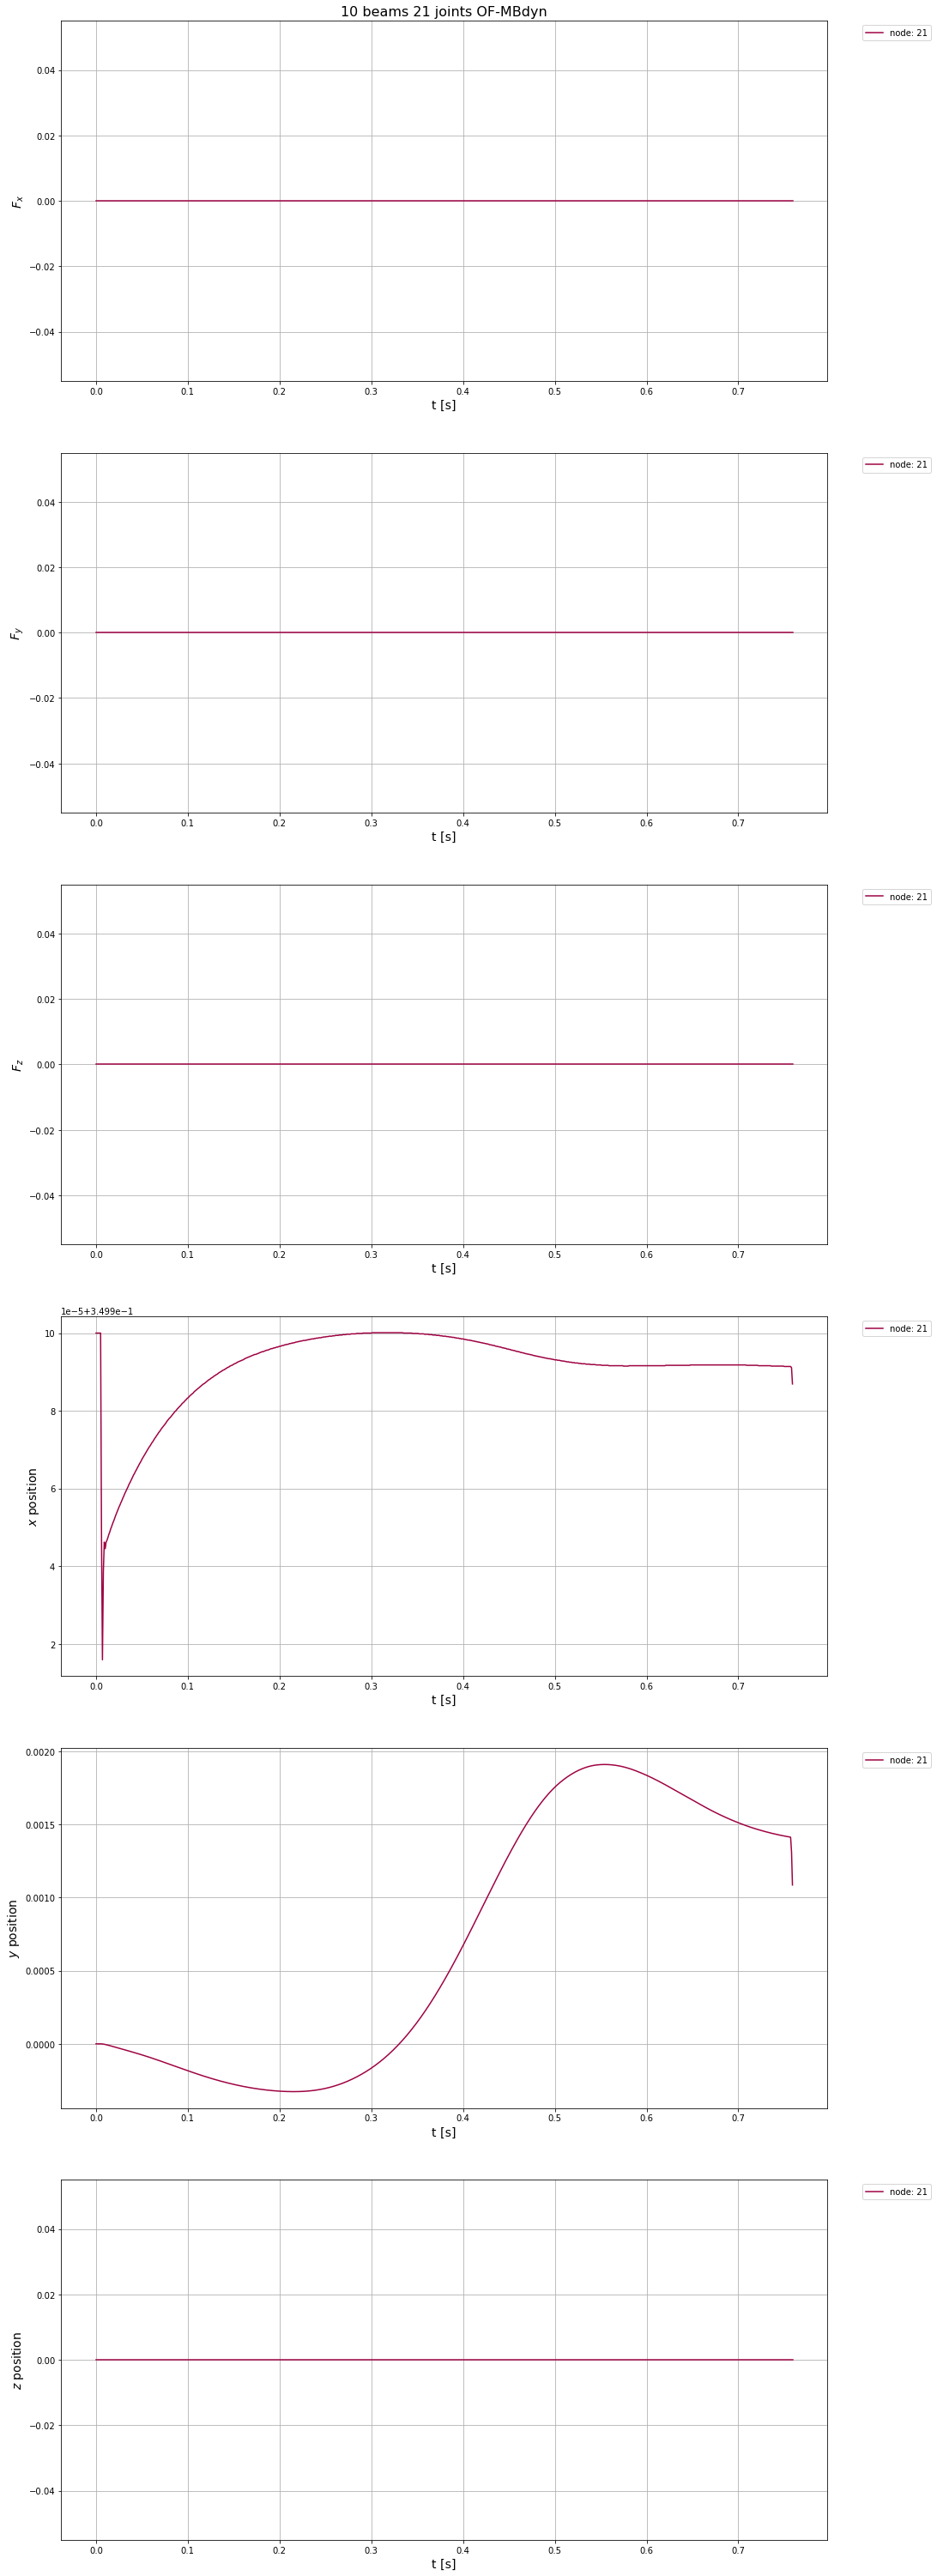

In [9]:
plot_frc(d_frc, title=title,filename=fname+'_nodal', dt=deltat, force_set='2', ext_struct=False)

# Plot INE

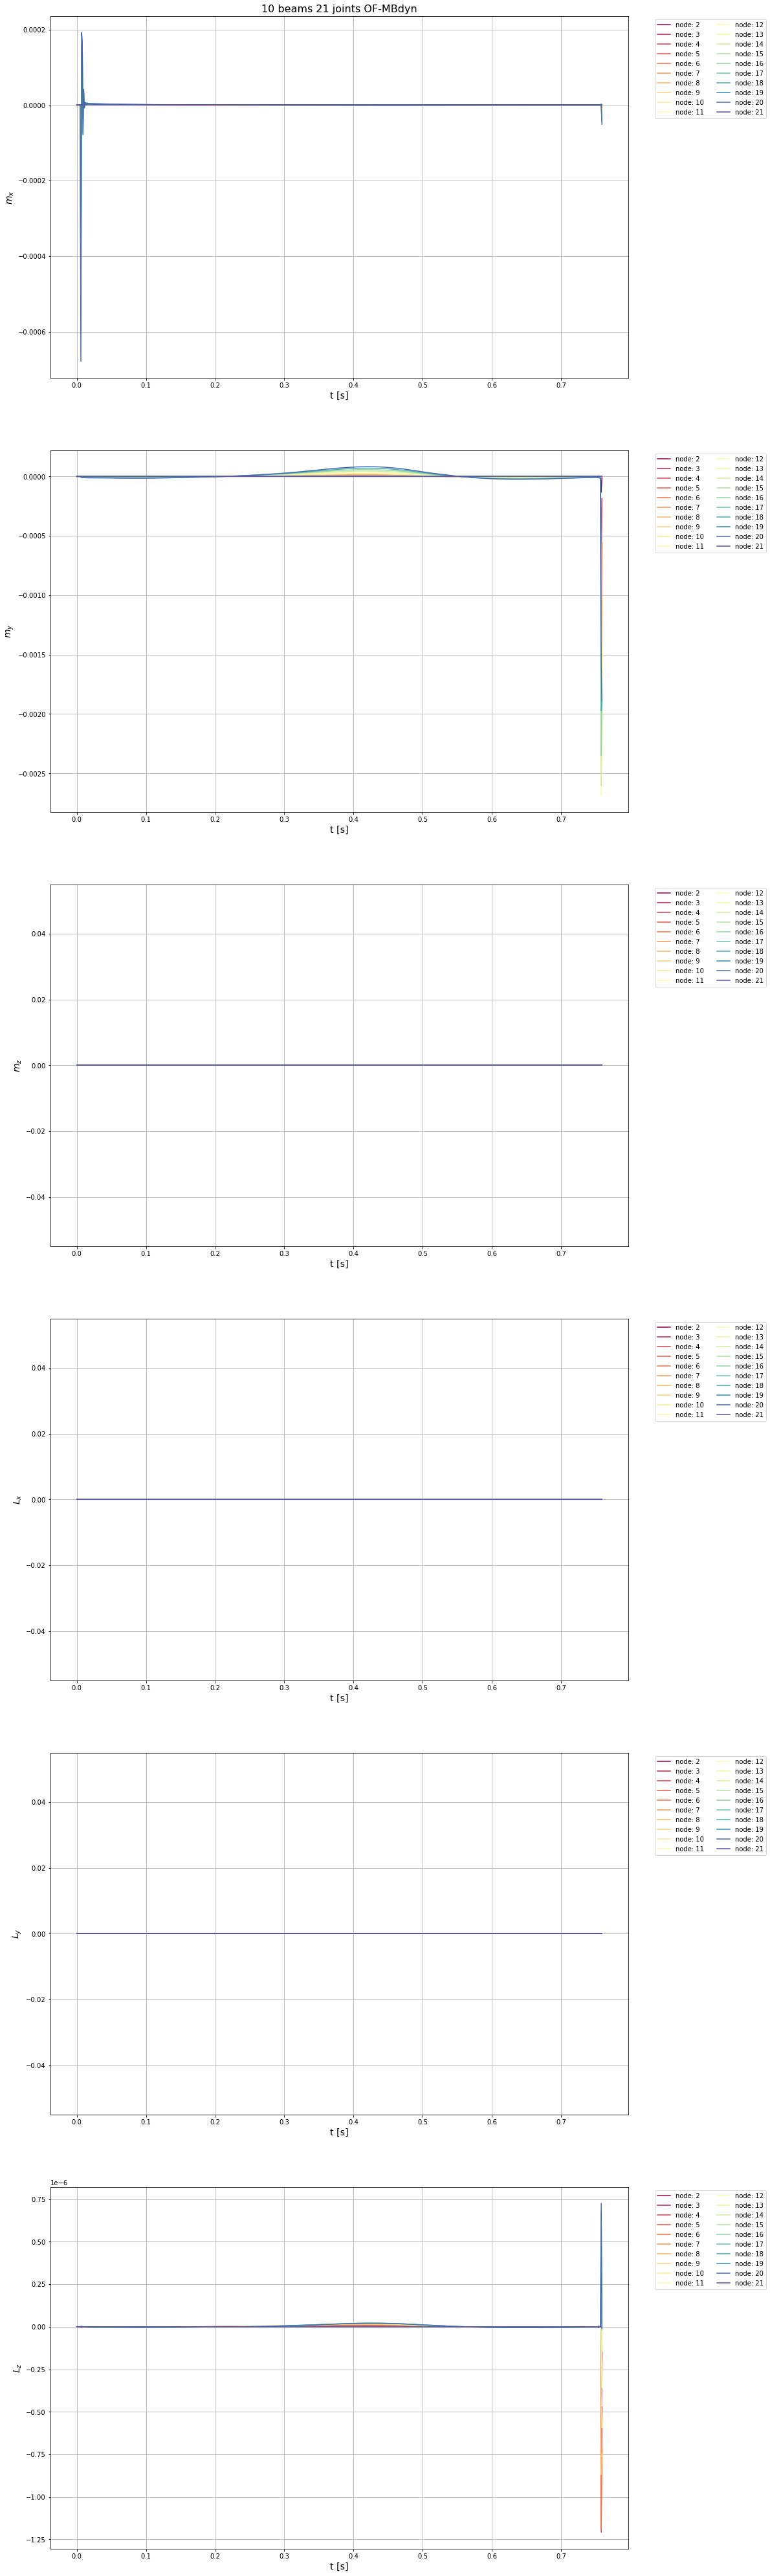

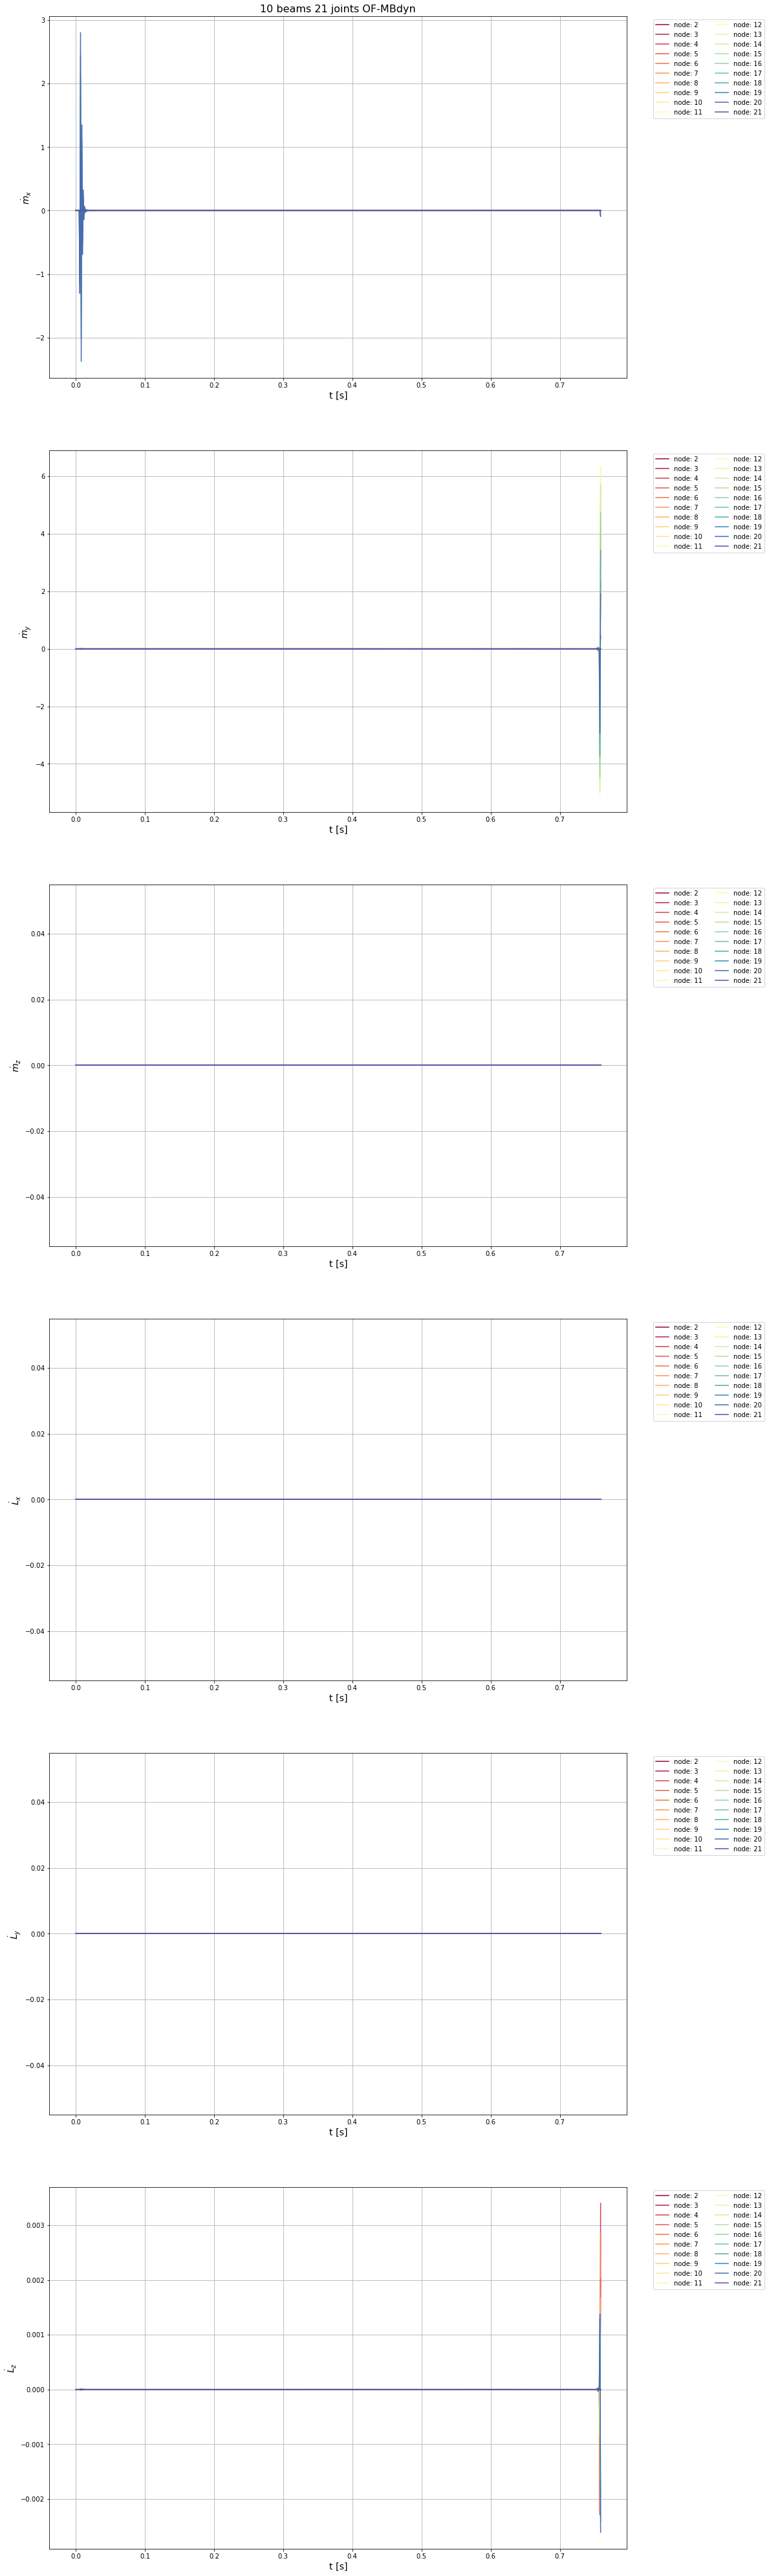

In [10]:
plot_ine(d_ine, title=title,filename=fname, dt=deltat)

# plot MOV

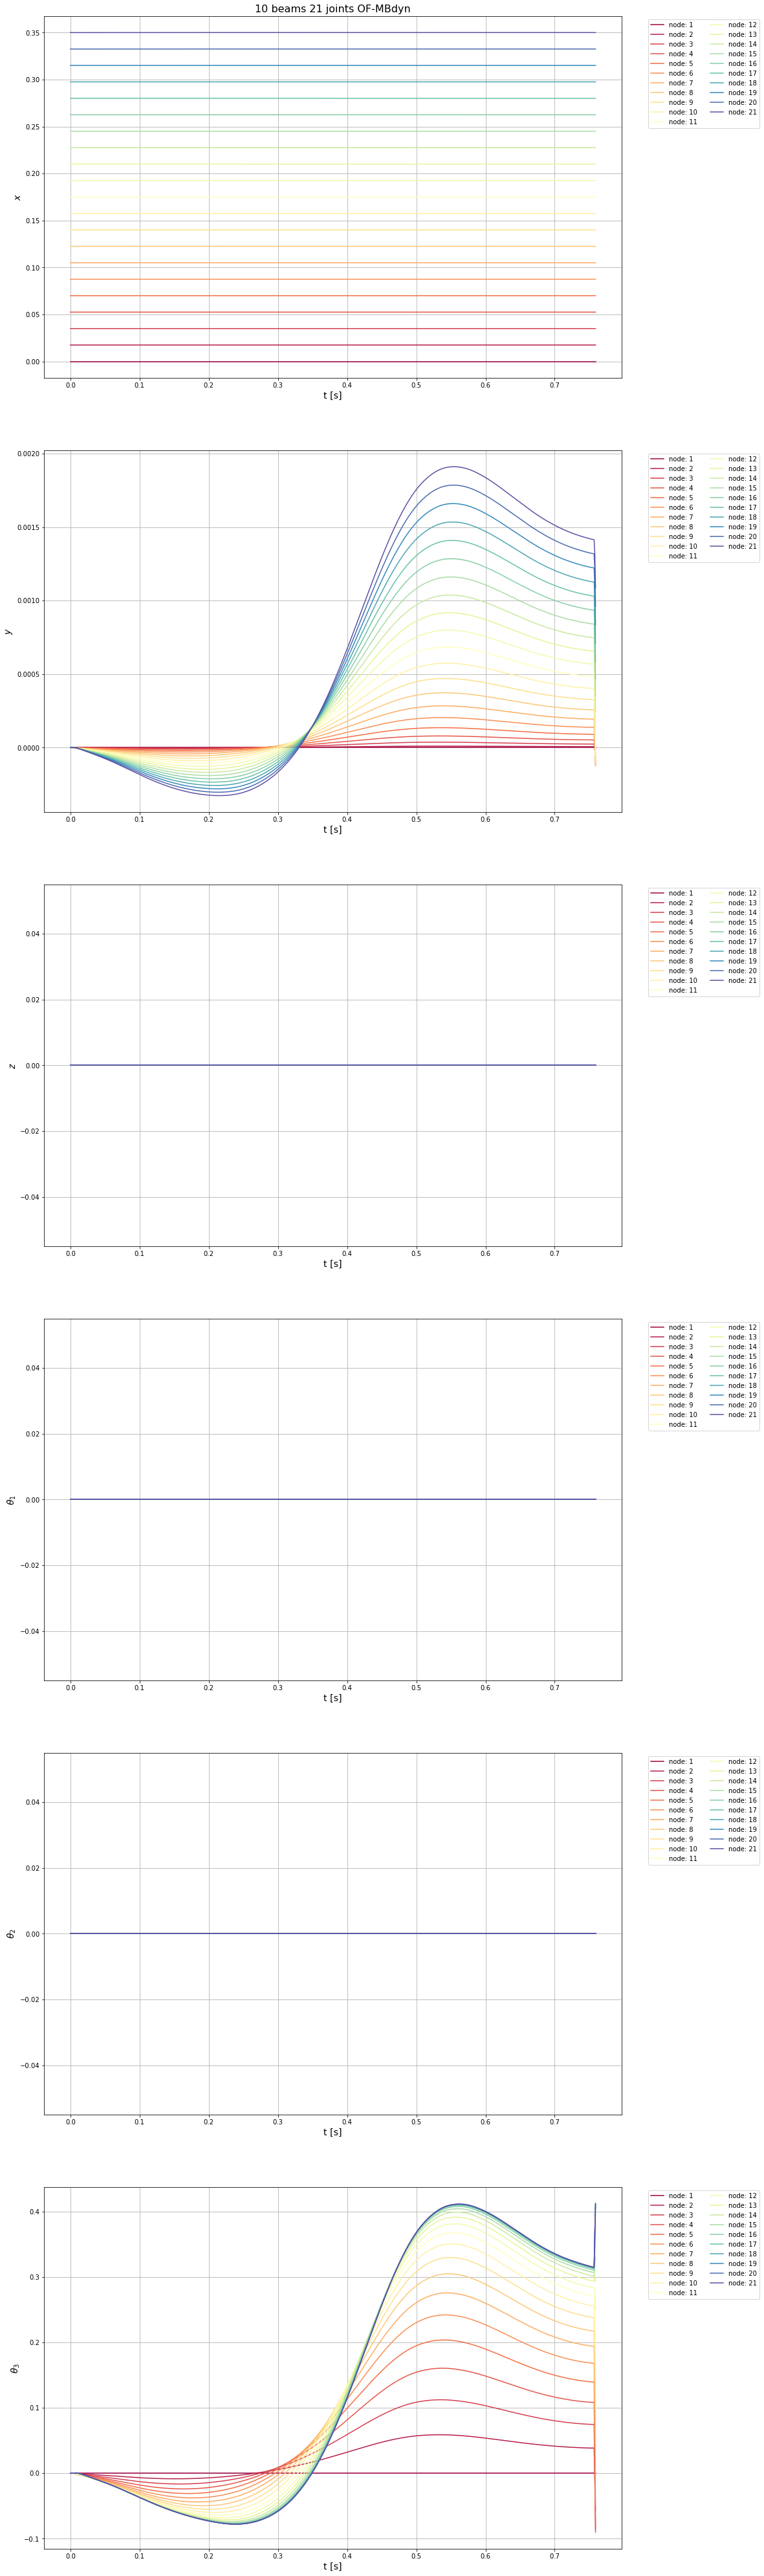

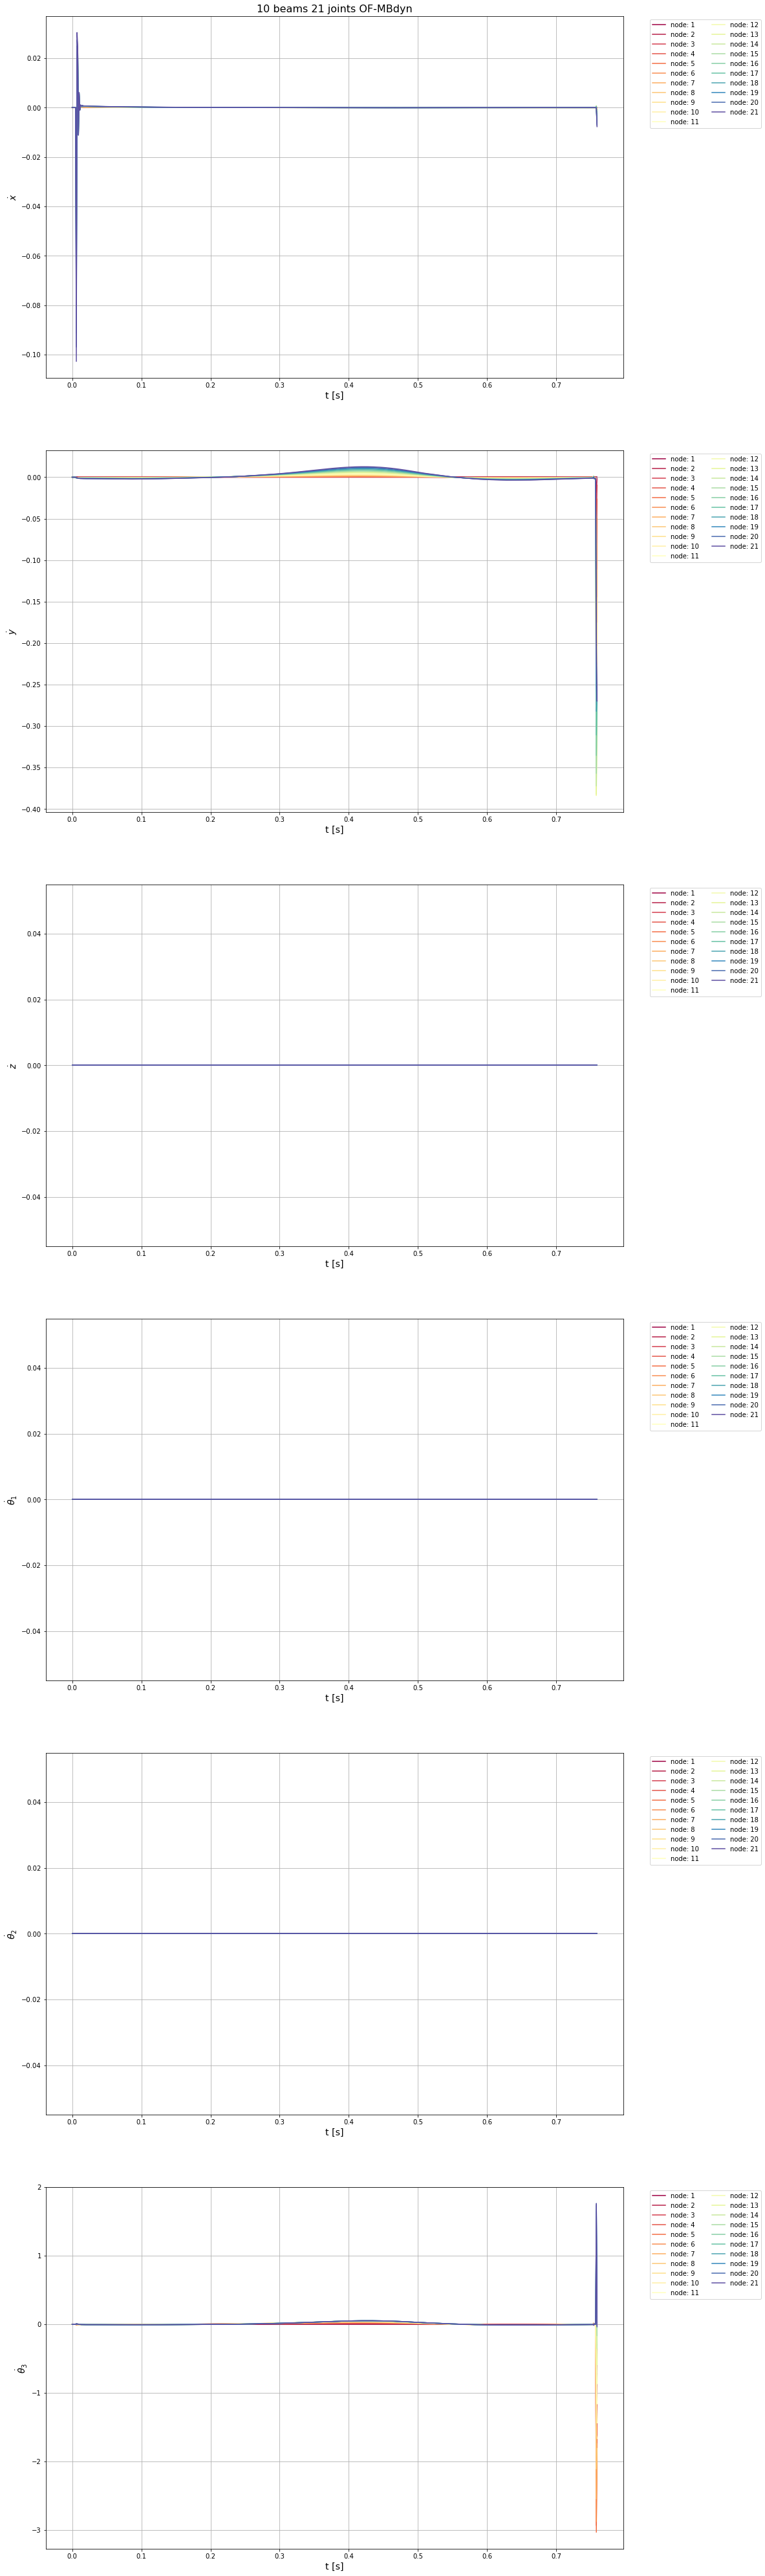

In [11]:
plot_mov(d_mov, title=title,filename=fname, dt=deltat)

# Plot JNT

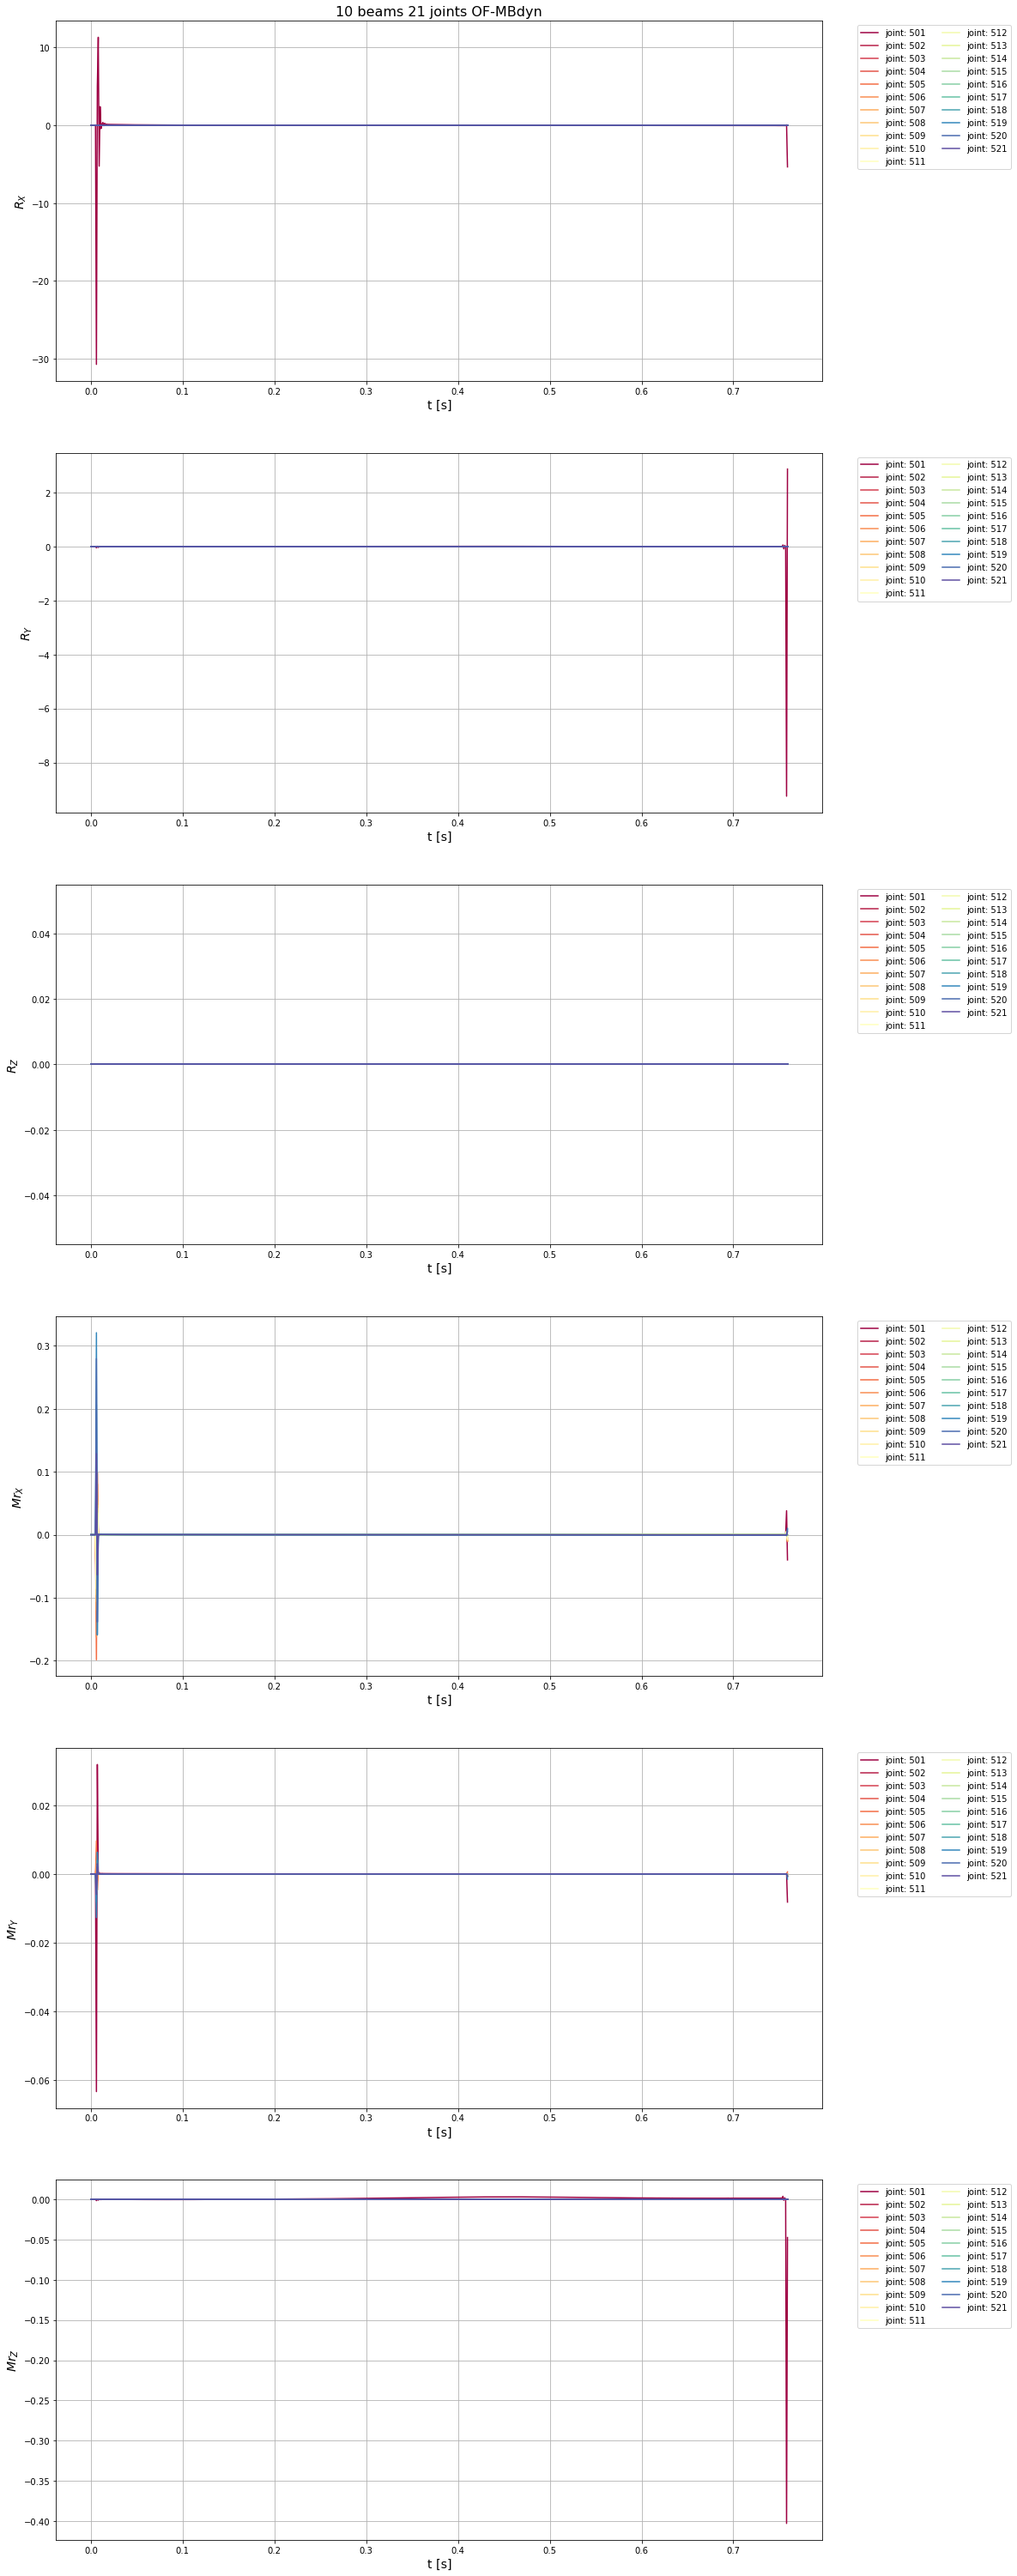

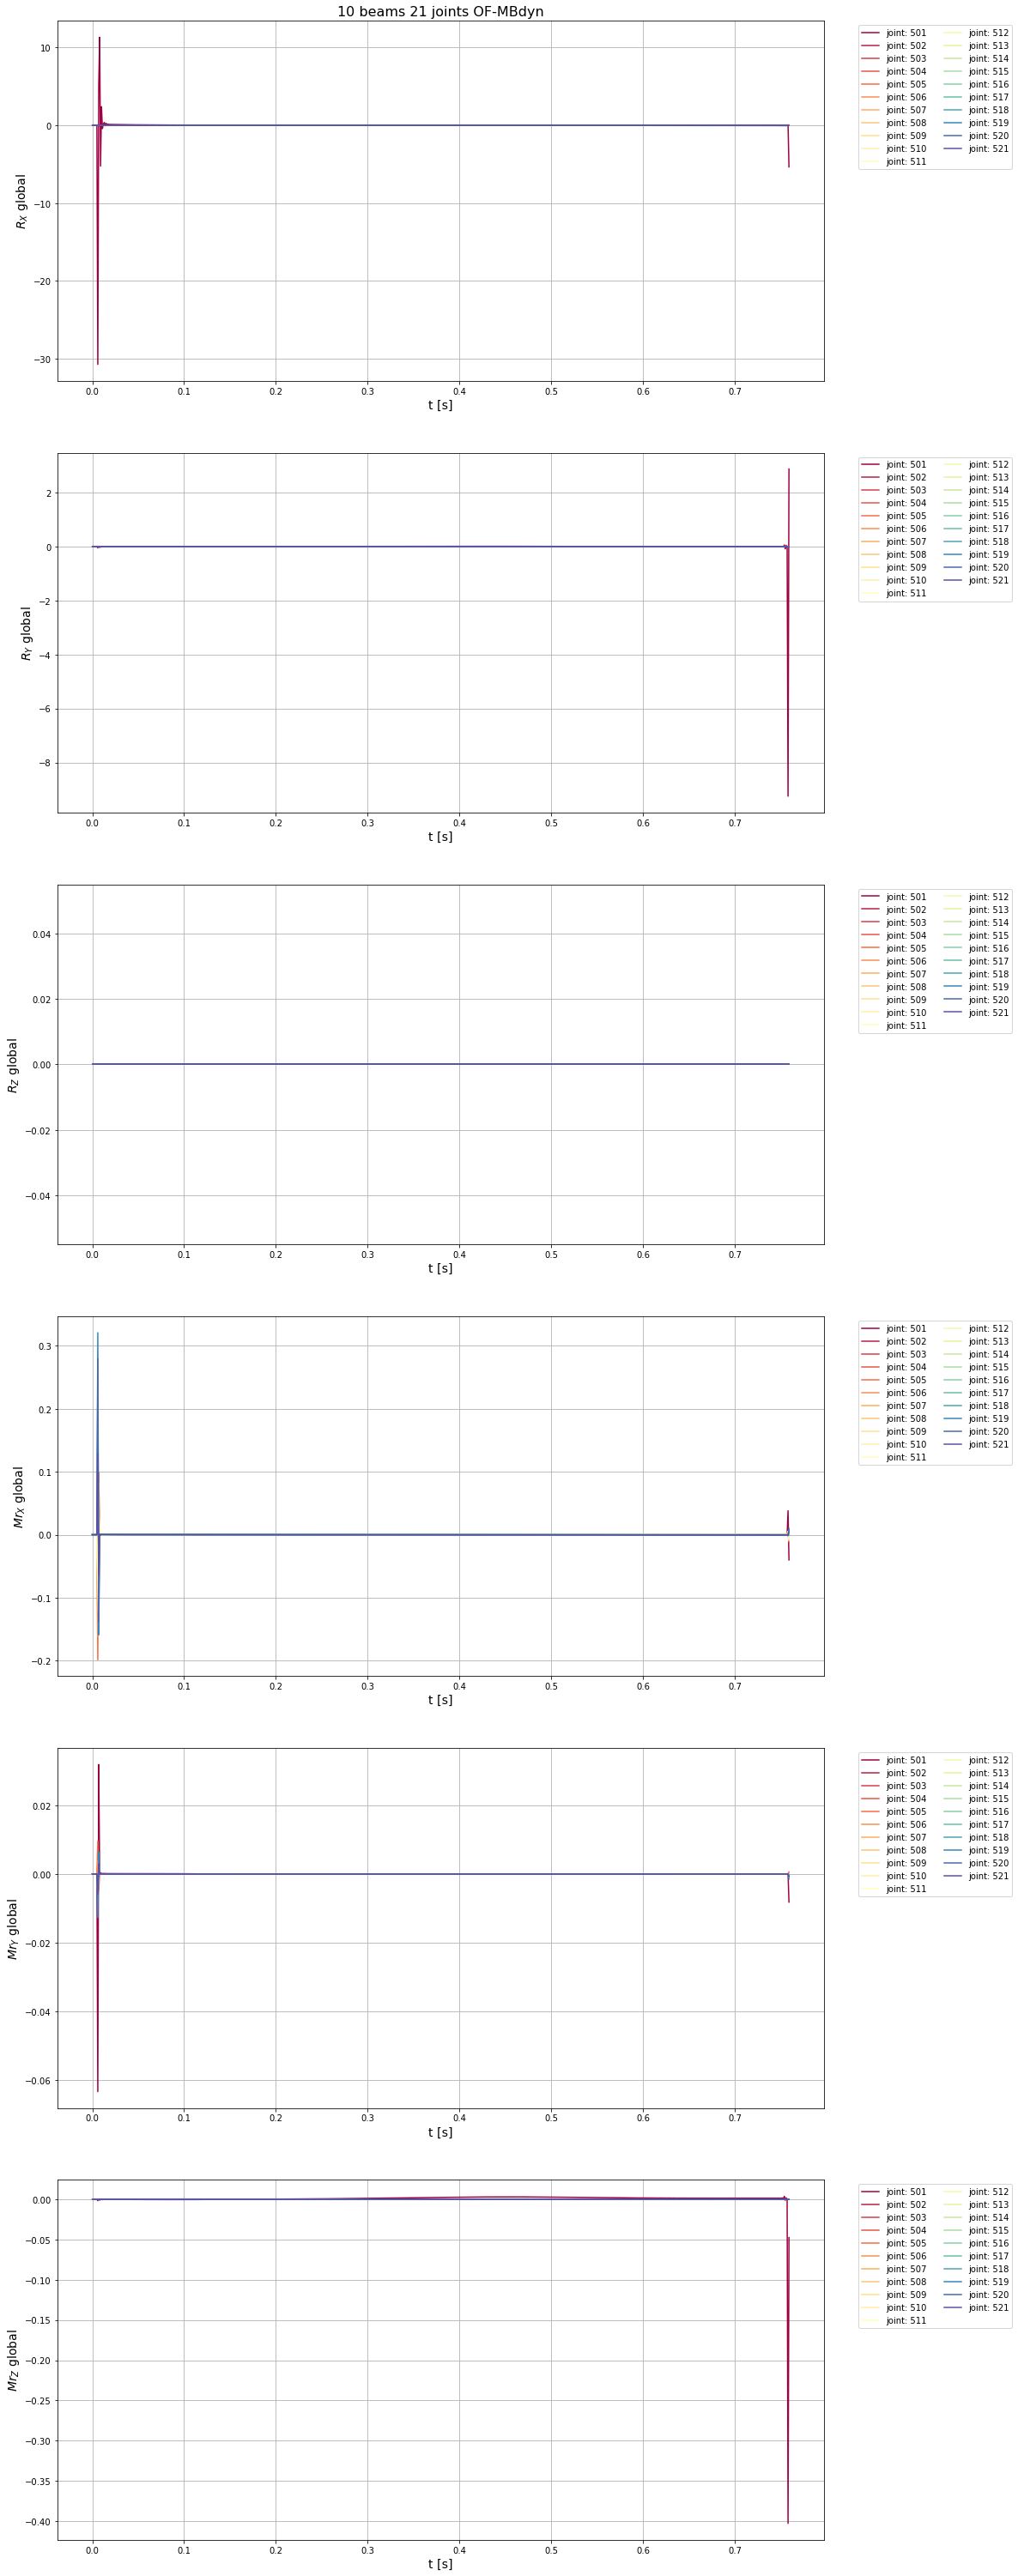

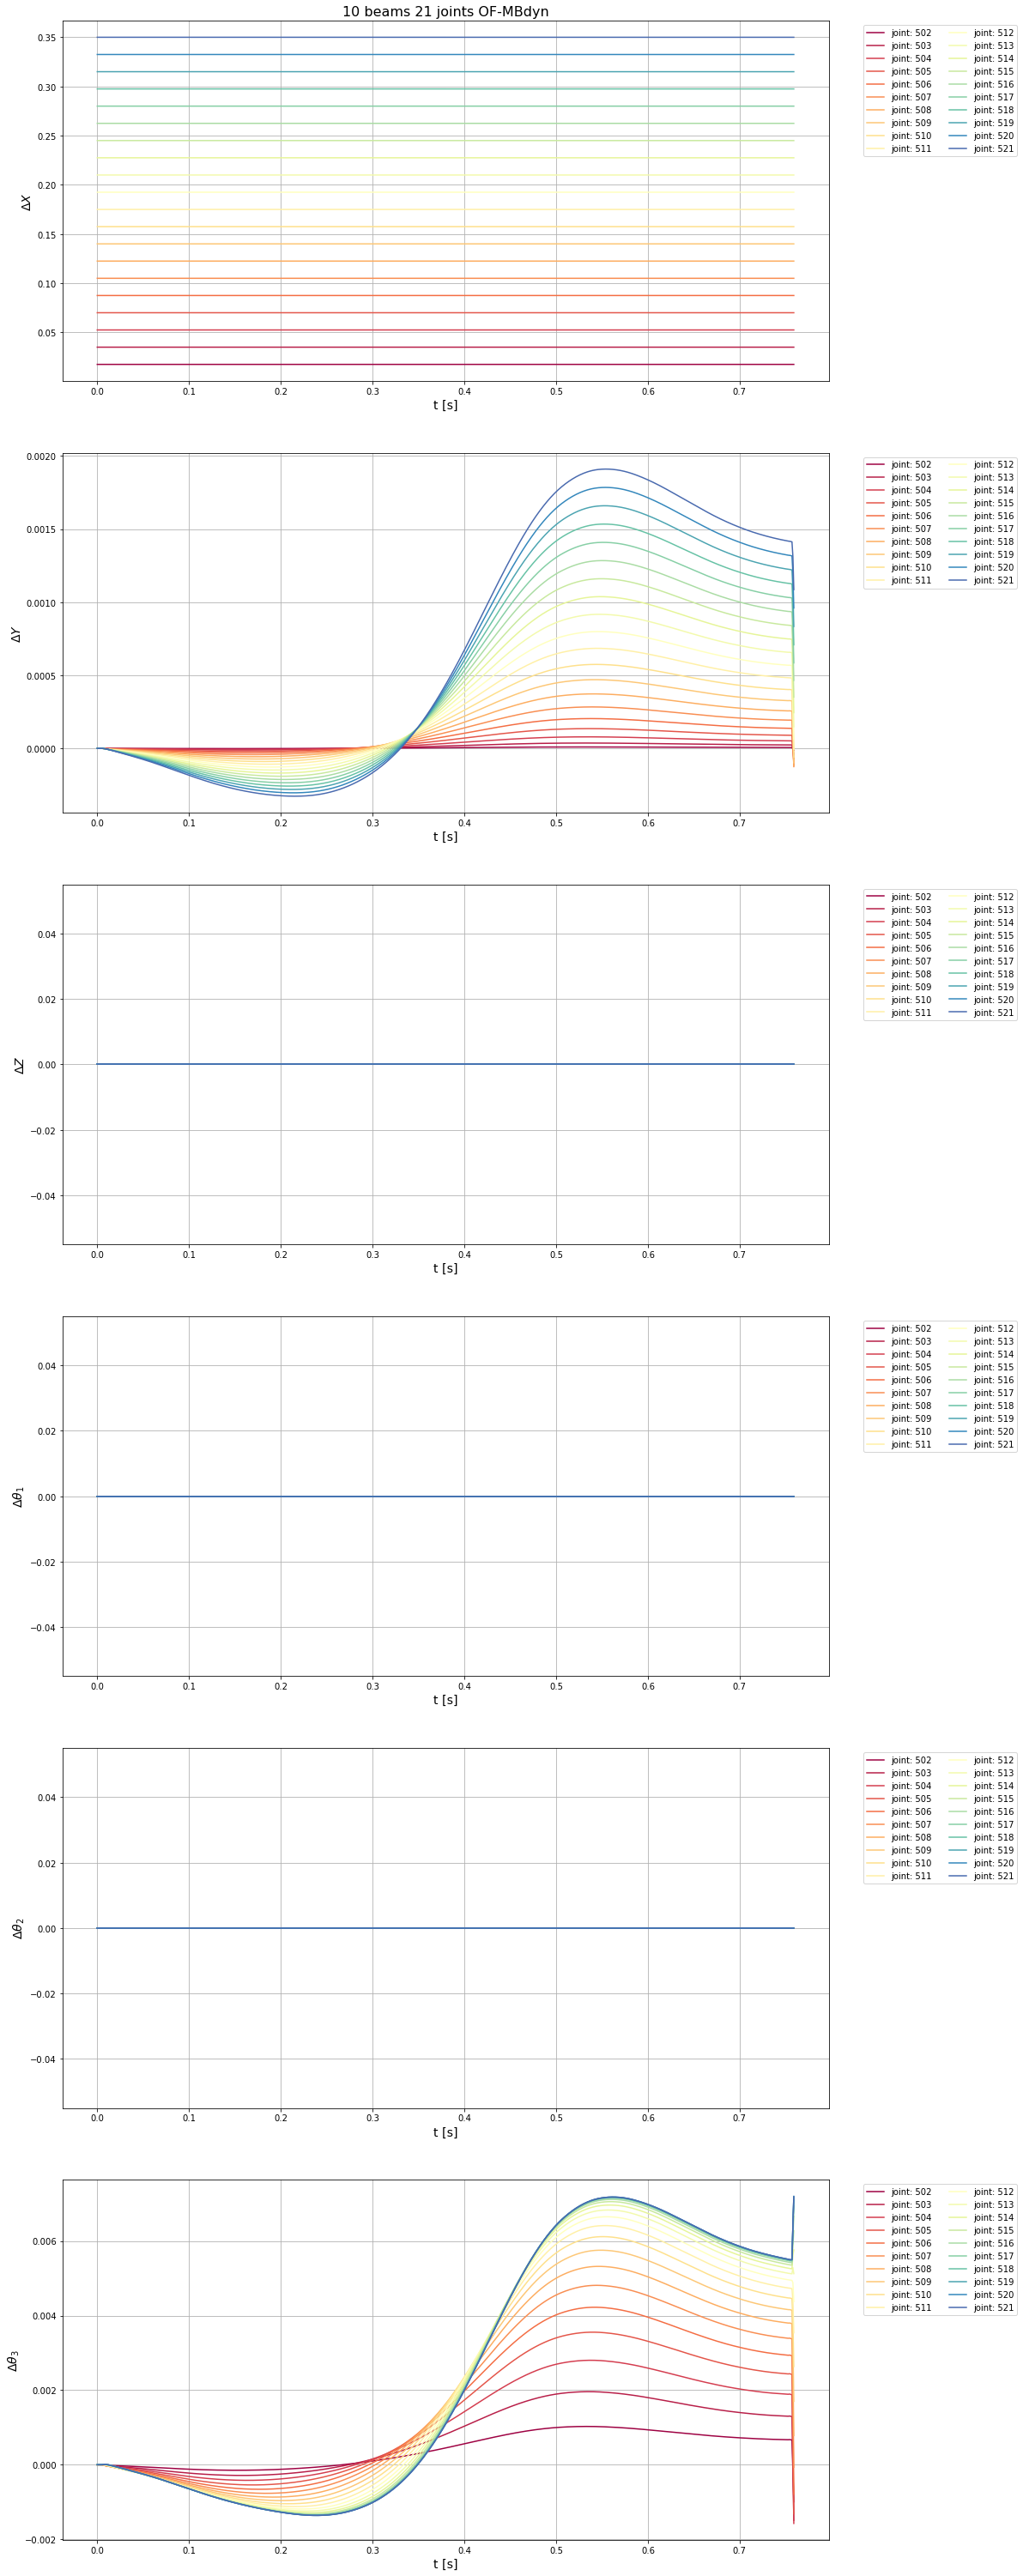

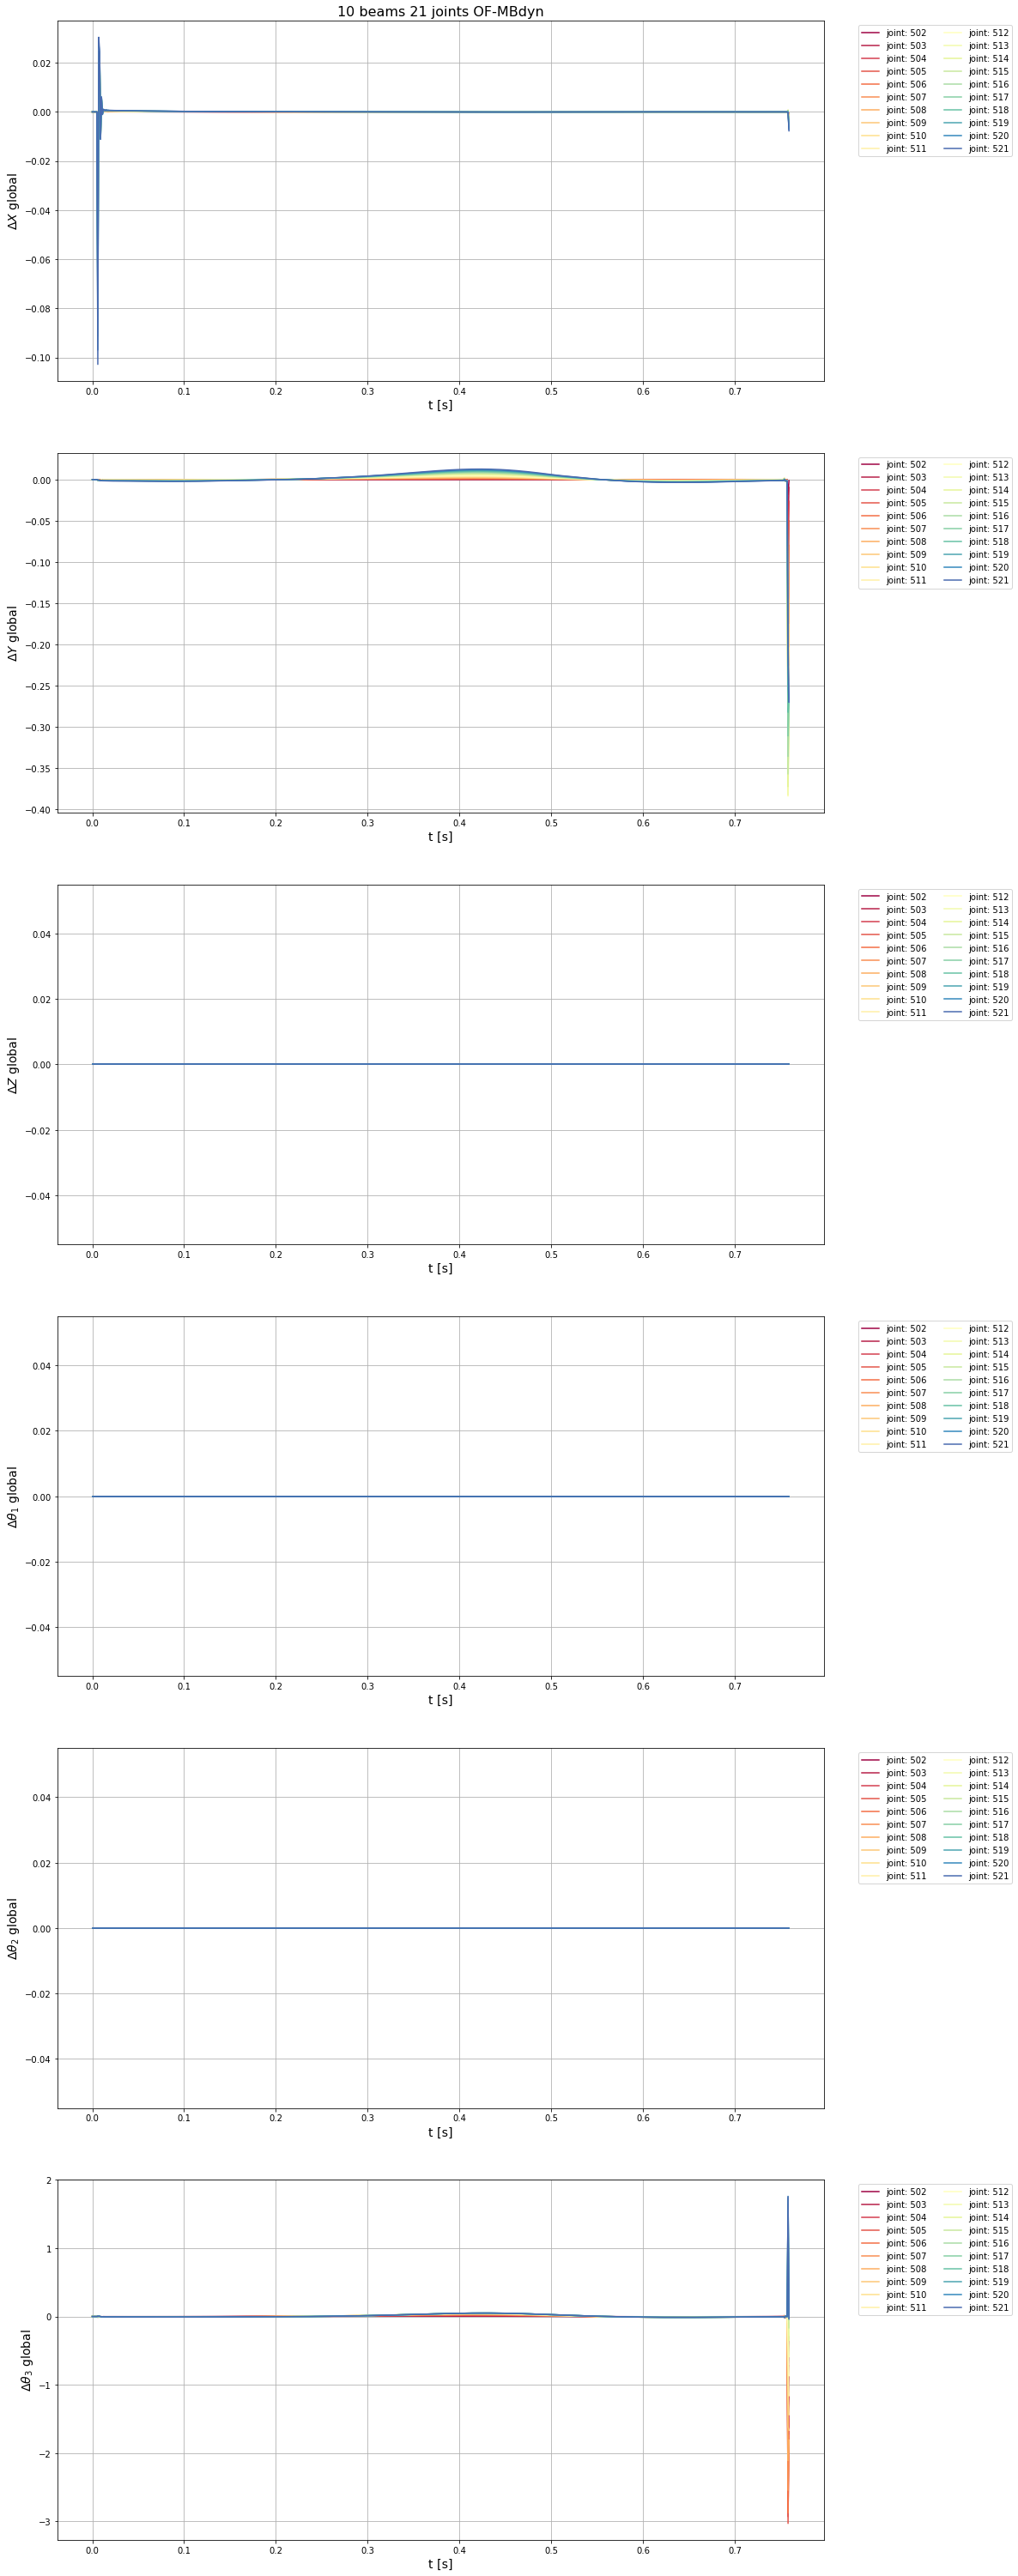

In [12]:
plot_jnt(d_jnt, title=title,filename=fname, dt=deltat) #, select = [False, False, True, False])

In [13]:
L = 1.0
E = 2.0e6
w = 0.2
h = 0.1
F = 20.
A = w*h
J = 1/12.*w*h**3
ΔL = F*L/(E*A)
ΔL*1e6

499.9999999999999

In [14]:
Fy = 10.
ΔLy = Fy*L**3/(3*E*J)
ΔLy

0.09999999999999998

In [15]:
tip_data = np.genfromtxt('../precice-Solid-watchpoint-tip.log', skip_header = 1)

No handles with labels found to put in legend.


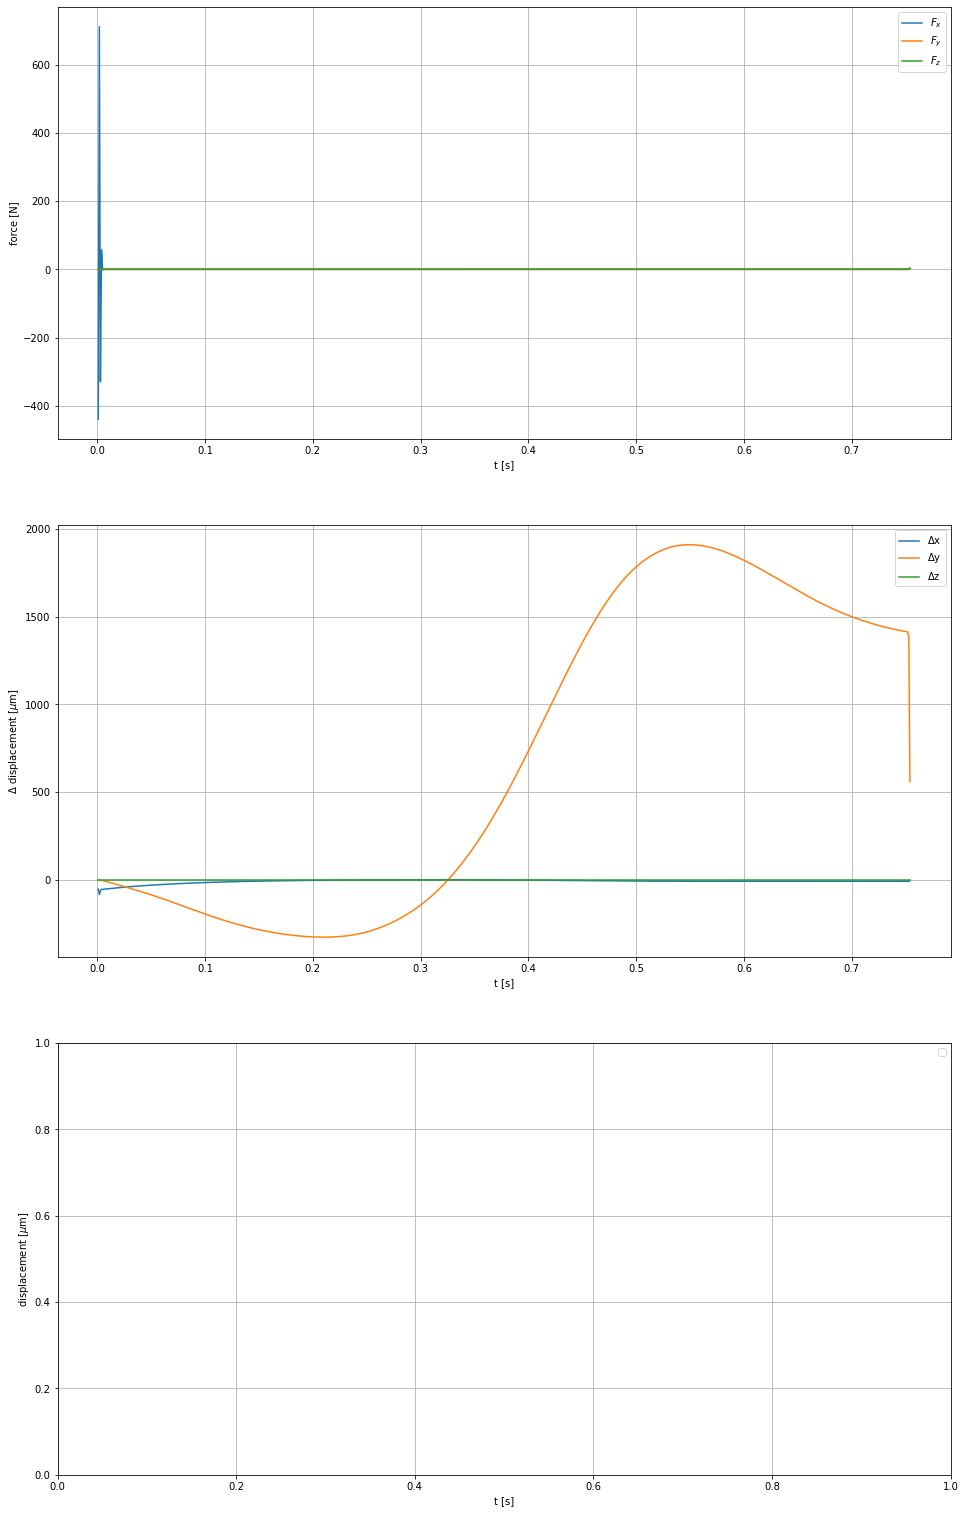

In [16]:
plt.figure(figsize=(16,27))
plt.subplot(3,1,1)
plt.plot(tip_data[:,0],tip_data[:,4],label=r'$F_x$')
plt.plot(tip_data[:,0],tip_data[:,5],label=r'$F_y$')
plt.plot(tip_data[:,0],tip_data[:,6],label=r'$F_z$')
#plt.plot(tip_data[:,0],tip_data[:,6],label=r'$F_z$')
plt.xlabel('t [s]')
plt.ylabel('force [N]')
plt.grid()
plt.legend()
plt.subplot(3,1,2)
plt.plot(tip_data[:,0],1e6*tip_data[:,7],label=r'$\Delta$x')
plt.plot(tip_data[:,0],1e6*tip_data[:,8],label=r'$\Delta$y')
plt.plot(tip_data[:,0],1e6*tip_data[:,9],label=r'$\Delta$z')
#plt.plot(tip_data[:,0],1e6*tip_data[:,9],label=r'$\Delta$z')
plt.xlabel('t [s]')
plt.ylabel(r'$\Delta$ displacement [$\mu$m]')
plt.grid()
plt.legend()
plt.subplot(3,1,3)

#plt.plot(tip_data[0:10,0],1e6*tip_data[0:10,9],label=r'$\Delta$z')
plt.xlabel('t [s]')
plt.ylabel(r'displacement [$\mu$m]')
plt.grid()
plt.legend();



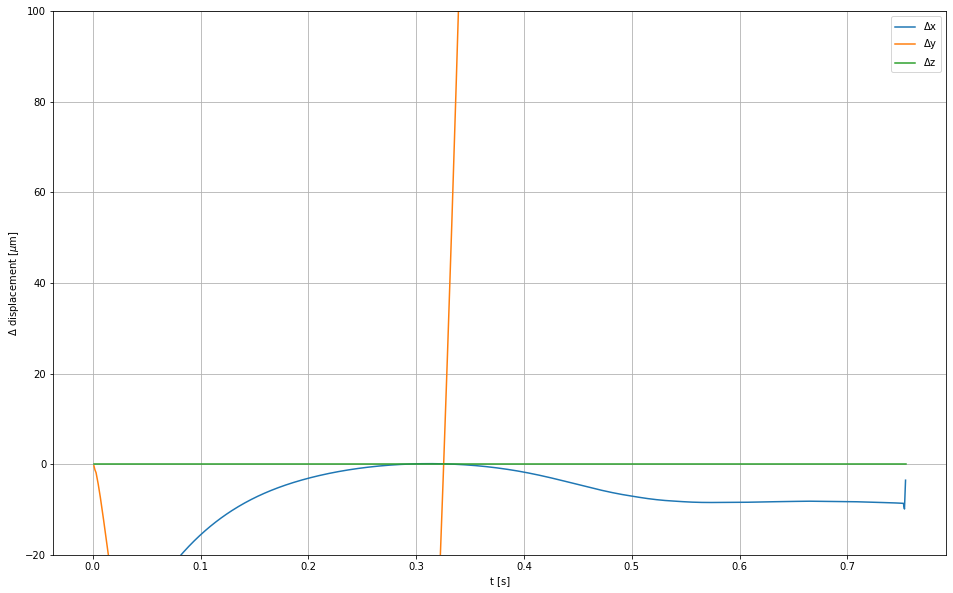

In [17]:
plt.figure(figsize=(16,10))
plt.plot(tip_data[:,0],1e6*tip_data[:,7],label=r'$\Delta$x')
plt.plot(tip_data[:,0],1e6*tip_data[:,8],label=r'$\Delta$y')
plt.plot(tip_data[:,0],1e6*tip_data[:,9],label=r'$\Delta$z')
#plt.plot(tip_data[:,0],1e6*tip_data[:,9],label=r'$\Delta$z')
plt.xlabel('t [s]')
plt.ylabel(r'$\Delta$ displacement [$\mu$m]')
plt.grid()
plt.ylim([-20,100])
plt.legend();
plt.savefig('tip_disp_OF-MBd.png')

In [18]:
p = 1.
ω = p*w
δ = ω*L**4/(8*E*J)
δ

0.0007499999999999998

In [19]:
cx_data = np.genfromtxt('./precice-Calculix-watchpoint-point1.log', skip_header = 1)

OSError: ./precice-Calculix-watchpoint-point1.log not found.

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(tip_data[:,0],1e6*disp_x,label=r'MBD $\Delta$x')
plt.plot(tip_data[:,0],1e6*disp_y,label=r'MBD $\Delta$y')
plt.plot(tip_data[:,0],1e6*disp_z,label=r'MBD $\Delta$z')
plt.plot(cx_data[:,0],1e6*cx_data[:,7],label=r'CX $\Delta$x')
plt.plot(cx_data[:,0],1e6*cx_data[:,8],label=r'CX $\Delta$y')
plt.plot(cx_data[:,0],1e6*cx_data[:,9],label=r'CX $\Delta$z')
#plt.plot(tip_data[0:10,0],1e6*tip_data[0:10,9],label=r'$\Delta$z')
plt.xlabel('t [s]')
plt.ylabel(r'displacement [$\mu$m]')
plt.grid()
plt.legend();



In [ ]:
np.max(disp_x)